In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
score = pd.read_csv('/content/drive/MyDrive/Weather Data Project (Southwest Airlines)/Final_Scores.csv')
expense = pd.read_csv('/content/drive/MyDrive/Weather Data Project (Southwest Airlines)/Expenses.csv')

In [5]:
score

,Origin_Airport,temperature_C,dew_point_C,humidity_percent,precipitation_mm,wind_direction_deg,wind_speed_kmh,pressure_hPa,snow_mm,temperature_C_norm,dew_point_C_norm,humidity_percent_norm,precipitation_mm_norm,wind_direction_deg_norm,wind_speed_kmh_norm,pressure_hPa_norm,snow_mm_norm,weather_score
0,ABQ,13.532428,-0.793102,42.575370,0.027236,159.506501,11.948398,1014.677152,0.033099,0.493912,0.076056,0.275029,0.064433,0.448883,0.366002,0.614308,0.002813,33.351688
1,ANC,4.876608,0.202290,73.311985,0.082036,149.355188,10.256527,1008.883454,11.768046,0.108682,0.121327,0.882070,0.305966,0.336519,0.174351,0.000000,1.000000,44.516339
2,ATL,17.784052,10.817516,66.956745,0.142573,190.751819,12.703383,1018.012350,0.015550,0.683131,0.604116,0.756556,0.572786,0.794733,0.451525,0.967941,0.001321,76.773986
3,BOI,10.220627,1.039098,57.984524,0.038215,157.451648,10.592378,1016.318609,0.401662,0.346519,0.159386,0.579356,0.112822,0.426138,0.212396,0.788353,0.034132,31.502924
4,BOS,11.103206,4.764632,67.533040,0.133324,208.111923,16.792981,1015.810048,0.707721,0.385799,0.328826,0.767937,0.532022,0.986890,0.914784,0.734430,0.060139,63.173515
5,BZN,6.874078,0.770679,68.528328,0.047080,149.561259,8.751592,1017.107355,0.707721,0.197580,0.147178,0.787594,0.151896,0.338800,0.003876,0.871984,0.060139,26.882697
6,CLT,17.069885,9.691706,65.931965,0.129303,155.517197,9.958159,1017.759710,0.039691,0.651347,0.552914,0.736316,0.514301,0.404726,0.140553,0.941153,0.003373,68.976262
7,DEN,9.835394,-0.710903,54.432325,0.044515,183.998021,15.645963,1013.659235,0.729470,0.329374,0.079795,0.509201,0.140589,0.719976,0.784853,0.506378,0.061987,35.177519
8,DSM,9.794196,4.650349,71.827896,0.158520,179.203579,13.996020,1016.459723,1.705411,0.327541,0.323629,0.852760,0.643075,0.666907,0.597951,0.803315,0.144919,65.615800
9,FSD,6.146172,1.873933,75.791505,0.127786,159.561654,13.690576,1016.294041,2.954011,0.165185,0.197355,0.931040,0.507613,0.449493,0.563352,0.785748,0.251020,52.175868


In [6]:
expense

,Airport,Expense ($)
0,ABQ,"10,270,064"
1,ANC,"17,880,282"
2,ATL,"127,766,760"
3,BOI,"5,241,455"
4,BOS,"216,608,688"
5,BZN,"2,505,139"
6,CLT,"71,714,652"
7,DEN,"305,577,669"
8,DSM,"5,480,486"
9,FSD,"1,151,730"


In [7]:
expense.rename(columns={'Airport': 'Origin_Airport'}, inplace=True)

In [13]:
expense["Expense ($)"] = (
    expense['Expense ($)']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2899848137.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

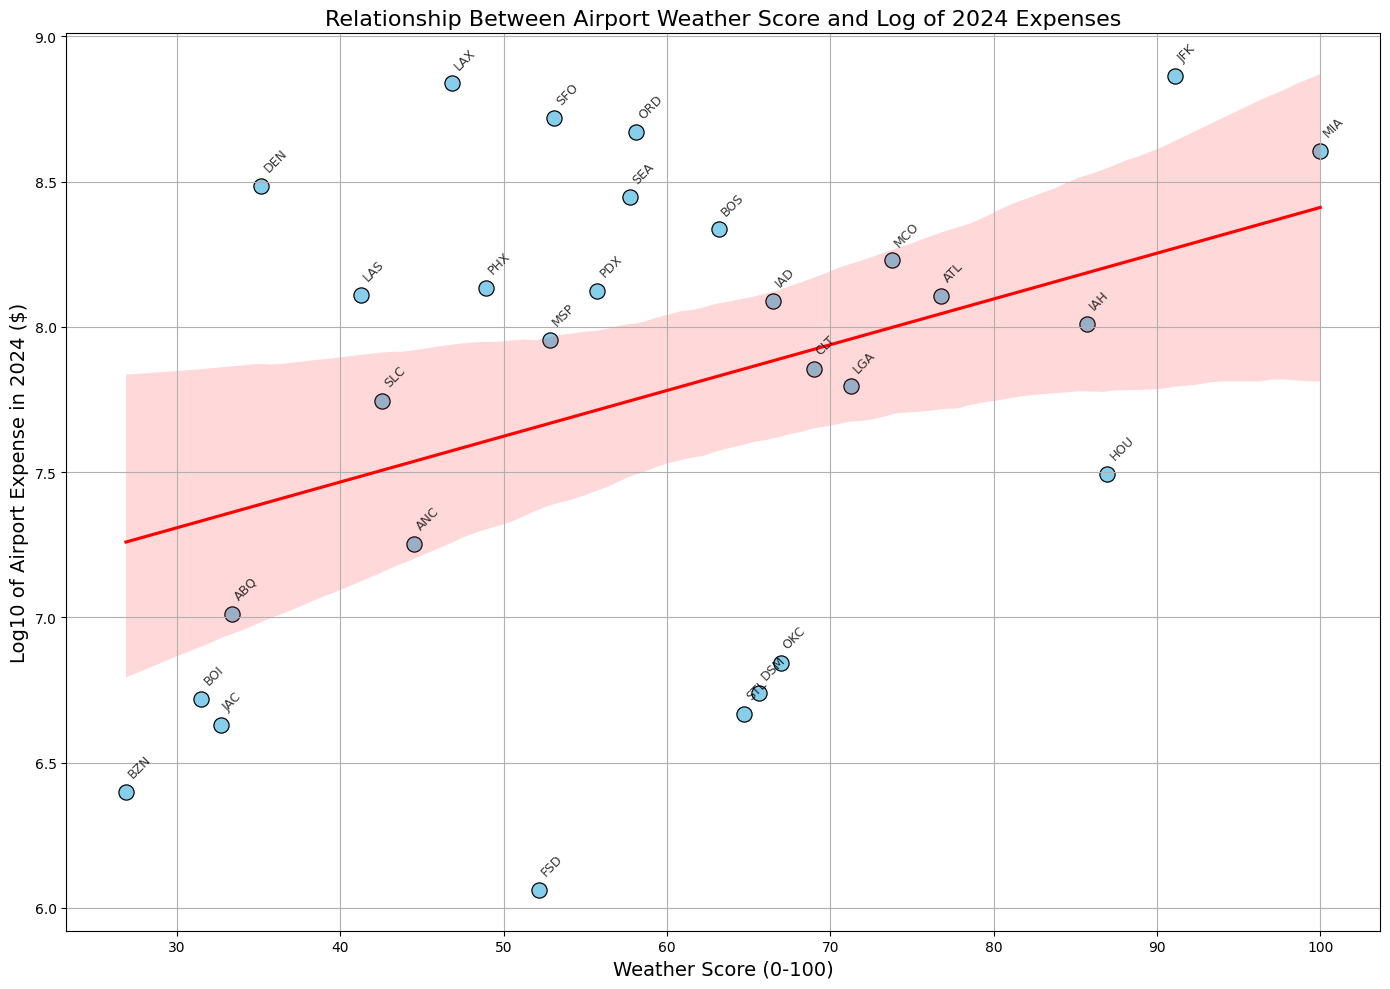

Pearson correlation (weather score vs log-expense): 0.37, p-value: 0.0476


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.merge(score, expense, on="Origin_Airport")

df['Log_Expense'] = np.log10(df['Expense ($)'] + 1)

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='weather_score', y='Log_Expense', s=120, color='skyblue', edgecolor='k')

sns.regplot(data=df, x='weather_score', y='Log_Expense', scatter=False, color='red', ci=95)

for i in range(len(df)):
    plt.text(df['weather_score'][i]+0.002, df['Log_Expense'][i]+0.05,
             df['Origin_Airport'][i], fontsize=9, alpha=0.8, rotation=45)


plt.title("Relationship Between Airport Weather Score and Log of 2024 Expenses", fontsize=16)
plt.xlabel("Weather Score (0-100)", fontsize=14)
plt.ylabel("Log10 of Airport Expense in 2024 ($)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

corr, p_value = pearsonr(df['weather_score'], df['Log_Expense'])
print(f"Pearson correlation (weather score vs log-expense): {corr:.2f}, p-value: {p_value:.4f}")
